In [162]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

<AxesSubplot:xlabel='Date'>

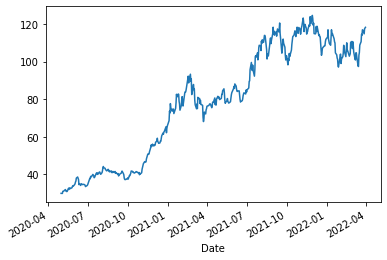

In [163]:
# 원달러환율(USD/KRW)
df = fdr.DataReader('REMX', "2020/5/1", "2022/3/31")
df['Close'].plot()

In [164]:
# data type 확인후 불필요한 목록 삭제
df.info()

drop_columns = ['Open', 'High', 'Low', 'Volume', 'Change']
df.drop(drop_columns, axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 484 entries, 2020-05-01 to 2022-03-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   484 non-null    float64
 1   Open    484 non-null    float64
 2   High    484 non-null    float64
 3   Low     484 non-null    float64
 4   Volume  484 non-null    float64
 5   Change  484 non-null    float64
dtypes: float64(6)
memory usage: 26.5 KB


In [165]:
# 컬럼명 변경
df = df.rename(columns={'Close':'REMX'})

In [166]:
# 인덱스를 컬럼으로
df['Date'] = df.index

In [167]:
df = df[['Date', "REMX"]]
df


,Date,REMX
Date,,
2020-05-01,2020-05-01,29.93
2020-05-04,2020-05-04,29.89
2020-05-05,2020-05-05,31.01
2020-05-06,2020-05-06,31.07
2020-05-07,2020-05-07,31.08
...,...,...
2022-03-25,2022-03-25,116.80
2022-03-28,2022-03-28,114.81
2022-03-29,2022-03-29,117.54


In [168]:
# 시각화 확인"USD/KRW"
fig = px.line(df, x='Date', y=['REMX'])
fig.show()

In [171]:
df.to_csv('./csv/REMX.csv', index=None)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 484 entries, 2020-05-01 to 2022-03-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    484 non-null    datetime64[ns]
 1   REMX    484 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.3 KB
